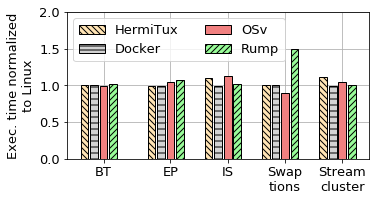

In [7]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 

matplotlib.rcParams.update({'font.size': 13})

fig, ax = plt.subplots()

btb_hermitux_mean = 186.16
btb_hermitux_std = 0.768866409433763
btb_linux_mean = 186.021
btb_linux_std = 0.566832328725956
btb_docker_mean = 187.377
btb_docker_std = 2.04729116422435
btb_osv_mean = 185.657
btb_osv_std = 51.4982010581168
btb_rump_mean = 189.311
btb_rump_std = 0.986356370126384
btb_kvm_mean = 187.371

epb_hermitux_mean = 84.607
epb_hermitux_std = 0.261790841024749
epb_linux_mean = 84.997
epb_linux_std = 0.355997815224254
epb_docker_mean = 84.76
epb_docker_std = 0.191485421551266
epb_osv_mean = 89.325
epb_osv_std = 2.48725305865281
epb_rump_mean = 90.787
epb_rump_std = 0.299445784371357
epb_kvm_mean = 85.017

isb_hermitux_mean = 1.503
isb_hermitux_std = 0.034334951418182
isb_linux_mean = 1.363
isb_linux_std = 0.041109609582189
isb_docker_mean = 1.351
isb_docker_std = 0.003162277660168
isb_osv_mean = 1.544
isb_osv_std = 0.14377451481786
isb_rump_mean = 1.392
isb_rump_std = 0.004216370213558
isb_kvm_mean = 1.51

swb_hermitux_avg = 3.4127963
swb_linux_avg = 3.3984421
swb_docker_avg = 3.3950316
swb_osv_avg = 3.0370323
swb_rump_avg = 5.0933127
swb_kvm_avg = 3.5277439

scb_hermitux_avg = 3.7108
scb_linux_avg = 3.349
scb_docker_avg = 3.338
scb_osv_avg = 3.5168
scb_rump_avg = 3.37
scb_kvm_avg = 3.87

linux_means_b = [btb_linux_mean, epb_linux_mean, isb_linux_mean, swb_linux_avg, scb_linux_avg]
hermitux_means_b = [btb_hermitux_mean, epb_hermitux_mean, isb_hermitux_mean, swb_hermitux_avg, scb_hermitux_avg]
docker_means_b = [btb_docker_mean, epb_docker_mean, isb_docker_mean, swb_docker_avg, scb_docker_avg]
osv_means_b = [btb_osv_mean, epb_osv_mean, isb_osv_mean, swb_osv_avg, scb_osv_avg]
rump_means_b = [btb_rump_mean, epb_rump_mean, isb_rump_mean, swb_rump_avg, scb_rump_avg]
kvm_means_b = [btb_kvm_mean, epb_kvm_mean, isb_kvm_mean, swb_kvm_avg, scb_kvm_avg]

# normalize hermitux_
hermitux_means_b_norm = []
for i, val in enumerate(hermitux_means_b):
    hermitux_means_b_norm.append(val/linux_means_b[i])
# normalize docker_b
docker_means_b_norm = []
for i, val in enumerate(docker_means_b):
    docker_means_b_norm.append(val/linux_means_b[i])
# normalize osv_a
osv_means_b_norm = []
for i, val in enumerate(osv_means_b):
    osv_means_b_norm.append(val/linux_means_b[i])
# normalize rump_b
rump_means_b_norm = []
for i, val in enumerate(rump_means_b):
    rump_means_b_norm.append(val/linux_means_b[i])
# normalize kvm
kvm_means_b_norm = []
for i, val in enumerate(kvm_means_b):
    kvm_means_b_norm.append(val/linux_means_b[i])
    
    
ax.grid()
ax.set_axisbelow(True)
    
plt.sca(ax)
plt.xticks((3, 10, 16, 22, 28), ("BT", "EP", "IS", "Swap\ntions", "Stream\ncluster"),
           rotation=0)

ax.set_ylim(0, 2)

l1 = mpatches.Patch(facecolor='skyblue', hatch="//", label='Linux', edgecolor='black')
l2 = mpatches.Patch(facecolor='moccasin', hatch="\\\\\\\\", label='HermiTux', edgecolor='black')
l3 = mpatches.Patch(facecolor='lightgray', hatch="---", label='Docker', edgecolor='black')
l4 = mpatches.Patch(facecolor='lightcoral', label='OSv', edgecolor='black')
l5 = mpatches.Patch(facecolor='palegreen', label='Rump', hatch="////", edgecolor='black')
#l6 = mpatches.Patch(facecolor='aqua', label='Linux (KVM)', hatch="////", edgecolor='black')
ax.legend(ncol=2, handles=[l2, l3, l4, l5], loc="upper left") #bbox_to_anchor=(1, .85))

rects15 = ax.bar([1, 8, 14, 20, 26], hermitux_means_b_norm, hatch="\\\\\\\\", color=["moccasin"], \
                edgecolor=['black', 'black', 'black', 'black', 'black'])
rects16 = ax.bar([2, 9, 15, 21, 27], docker_means_b_norm, hatch="--", color=["lightgray"], \
                edgecolor=['black', 'black', 'black', 'black', 'black'])
rects17 = ax.bar([3, 10, 16, 22, 28], osv_means_b_norm, color=["lightcoral"], \
                edgecolor=['black', 'black', 'black', 'black', 'black'])
rects18 = ax.bar([4, 11, 17, 23, 29], rump_means_b_norm, hatch="////", color=["palegreen"], \
                edgecolor=['black', 'black', 'black', 'black', 'black'])
#rects19 = ax.bar([5, 12, 18, 24, 30], kvm_means_b_norm, hatch="|||", color=["aqua"], \
#                edgecolor=['black', 'black', 'black', 'black', 'black'])

ax.set_ylabel("Exec. time normalized\nto Linux")    



fig.set_size_inches(6,3)
fig.subplots_adjust(bottom=0.2)
fig.subplots_adjust(left=0.2)
plt.savefig("NPB2-compact.pdf")
